In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
fr=pd.read_csv("forestfires (1).csv")

In [3]:
fr.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
# EDA

In [5]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
fr.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
fr['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

# CHANGING VALUES FROM LARGE TO 1 AND SMALL TO 0

In [8]:
fr['size_category']=np.where(fr['size_category'].str.contains("large"),1,0)

In [9]:
fr

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fr.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [11]:
fr.drop(['month','day'],axis=1,inplace=True)

In [12]:
fr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fr.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [14]:
#VISUALIZATION

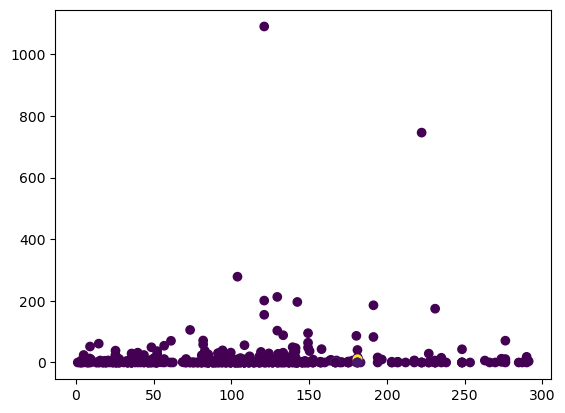

In [15]:
plt.scatter(fr["DMC"],fr["area"],c=fr["rain"])

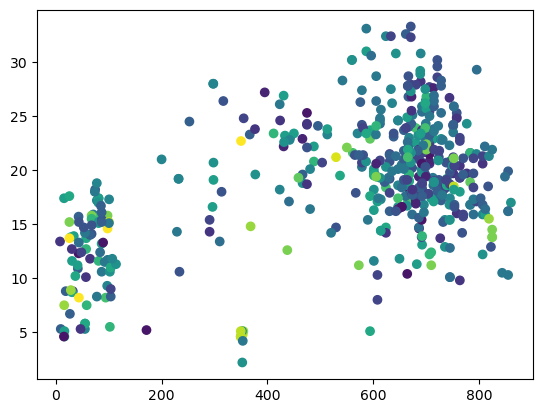

In [16]:
plt.scatter(fr["DC"],fr["temp"],c=fr["wind"])

In [17]:
#splitting data into x and y

In [18]:
x=fr.iloc[:,:28]
y=fr.iloc[:,28]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int32

In [20]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


# Splitting data into train and test 

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# RANDOMIZED SEARCH CV

In [22]:
rs=SVC()
param=[{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.001],'C':[10,0.1,0.001,0.00001]}]
gsv=RandomizedSearchCV(rs,param,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 1/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 2/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 3/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 4/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 5/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 6/10; 1/10] END C=0.1, gamma=0.1, ker

[CV 3/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 4/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 5/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 6/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 7/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 7/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 8/10; 7/10] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10; 7/10] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 1e-05],
                                         'gamma': [0.5, 0.1, 0.001],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [23]:
gsv.best_params_,gsv.best_score_

({'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}, 0.988963963963964)

In [24]:
#Applying SVM classification

In [25]:
svm=SVC(kernel='linear',C=10,gamma=0.5)
svm.fit(x_train,y_train)
y_preds=svm.predict(x_test)
ac=accuracy_score(y_test,y_preds)
print("Accuracy=",ac)
confusion_matrix(y_test,y_preds)

Accuracy= 0.9743589743589743


array([[104,   2],
       [  2,  48]], dtype=int64)

In [26]:
y_preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1])